In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('PIB.csv', encoding = 'latin-1')
df.head()

,Periodo,PIB Millones de pesos
0,1980/01,7547882.144
1,1980/02,7536518.992
2,1980/03,7478780.820
3,1980/04,8008666.640
4,1981/01,8229212.702


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
Periodo                  157 non-null object
PIB Millones de pesos    157 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [6]:
df['Periodo trimestral'] = [i for i in range(len(df['Periodo']))]

In [7]:
df.head()

,Periodo,PIB Millones de pesos,Periodo trimestral
0,1980/01,7547882.144,0
1,1980/02,7536518.992,1
2,1980/03,7478780.820,2
3,1980/04,8008666.640,3
4,1981/01,8229212.702,4


In [8]:
df_1 = df[['PIB Millones de pesos', 'Periodo trimestral']]
df_1.set_index('Periodo trimestral', inplace = True)
df_1

,PIB Millones de pesos
Periodo trimestral,
0,7.547882e+06
1,7.536519e+06
2,7.478781e+06
3,8.008667e+06
4,8.229213e+06
5,8.417818e+06
6,8.211046e+06
7,8.614525e+06
8,8.512096e+06


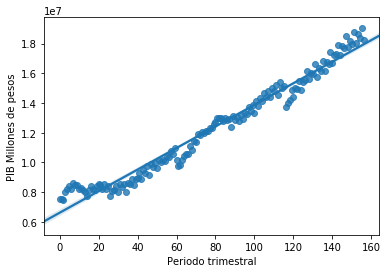

In [11]:
sns.regplot(df['Periodo trimestral'], df['PIB Millones de pesos'])

In [14]:
msk = np.random.rand(len(df_1)) < 0.8
train = df[msk]
test = df[~msk]

In [15]:
from sklearn import linear_model
Reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Periodo trimestral']])
train_y = np.asanyarray(train[['PIB Millones de pesos']])
Reg.fit(train_x, train_y)
print ('Coefficients: ', Reg.coef_)
print ('Intercept: ',Reg.intercept_)

Coefficients:  [[72181.14377193]]
Intercept:  [6685132.29933557]


Text(0, 0.5, 'PIB Millones de pesos')

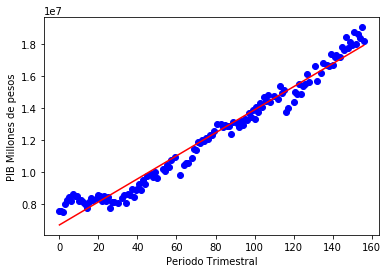

In [21]:
import matplotlib.pyplot as plt
plt.scatter(train['Periodo trimestral'], train['PIB Millones de pesos'],  color='blue')
plt.plot(train_x, Reg.coef_[0][0]*train_x + Reg.intercept_[0], '-r')
plt.xlabel("Periodo Trimestral")
plt.ylabel("PIB Millones de pesos")

In [23]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Periodo trimestral']])
test_y = np.asanyarray(test[['PIB Millones de pesos']])
test_y_ = Reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 472360.78
Residual sum of squares (MSE): 331684616649.08
R2-score: 0.96
